In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
model = YOLO('yolov8n-seg.yaml') # can try YOLOv9 seg model (yolov9e-seg.yaml) or (yolov9c-seg.yaml)
model = YOLO('yolov8n-seg.pt')  #  (yolov9e-seg.pt) or (yolov9c-seg.pt)

In [5]:
%cat /data/yolo/data.yaml

"cat" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
import yaml
yaml_path = "data/yolo/data.yaml"
with open(yaml_path, 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

Training the model

In [ ]:
project = "data/yolo/checkpoints/"

name = "X_epochs-"

In [ ]:
results = model.train(data=yaml_path,
                      project=project,
                      name=name,
                      epochs=10, # change to 100-200
                      patience=0,
                      batch=8,
                      imgsz=1250)

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/CSCI447_ML/data/YOLOv8/data.yaml, epochs=10, time=None, patience=0, batch=4, imgsz=1250, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints, name=10_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

100%|██████████| 755k/755k [00:00<00:00, 16.3MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 80.9MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[1250] must be multiple of max stride 32, updating to [1280]


train: Scanning /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/train/labels... 801 images, 1 backgrounds, 0 corrupt: 100%|██████████| 802/802 [02:10<00:00,  6.17it/s]


train: New cache created: /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [01:09<00:00,  2.89it/s]

val: New cache created: /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/valid/labels.cache


Plotting labels to /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      11.1G      2.129      3.539      5.433      1.853         10       1280: 100%|██████████| 201/201 [01:36<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]

                   all        200       1326      0.194      0.232       0.13     0.0554      0.198      0.213      0.125     0.0536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.02G      1.966      2.931      4.073      1.682         18       1280: 100%|██████████| 201/201 [01:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.07it/s]


                   all        200       1326      0.222      0.221      0.147     0.0567      0.244      0.209      0.143     0.0489

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      10.5G      1.978      2.828      3.661      1.729          3       1280: 100%|██████████| 201/201 [01:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]

                   all        200       1326      0.292      0.227      0.184     0.0709      0.281      0.229       0.18     0.0649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10       8.9G       1.93      2.756      3.238      1.677         10       1280: 100%|██████████| 201/201 [01:16<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]

                   all        200       1326      0.275      0.256      0.192     0.0866      0.344      0.231      0.192     0.0753



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.17G       1.84      2.571      2.867      1.587          8       1280: 100%|██████████| 201/201 [01:12<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        200       1326      0.305      0.271       0.22      0.101      0.312      0.266      0.221     0.0896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.09G      1.817      2.606      2.686       1.56         11       1280: 100%|██████████| 201/201 [01:11<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.09it/s]


                   all        200       1326      0.348      0.315      0.259      0.124      0.359      0.317      0.266      0.111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.57G       1.75      2.475        2.5      1.552          3       1280: 100%|██████████| 201/201 [01:15<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        200       1326      0.437      0.278      0.283      0.134      0.489      0.245      0.274      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.27G      1.711      2.422      2.362        1.5         15       1280: 100%|██████████| 201/201 [01:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.10it/s]

                   all        200       1326      0.406      0.294      0.295       0.14       0.38      0.301      0.283       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      10.9G      1.658      2.381       2.24      1.462         13       1280: 100%|██████████| 201/201 [01:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]

                   all        200       1326      0.475      0.333      0.323      0.159      0.469       0.32      0.325      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10        13G      1.619      2.354      2.192      1.459         12       1280: 100%|██████████| 201/201 [01:13<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]

                   all        200       1326      0.436       0.35      0.331       0.17      0.463      0.308      0.318      0.148



10 epochs completed in 0.238 hours.
Optimizer stripped from /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-/weights/best.pt...
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.40it/s]


                   all        200       1326      0.436       0.35      0.331       0.17      0.467      0.306      0.318      0.148
             Oil Spill        200        527      0.497      0.454       0.45      0.237      0.516      0.376        0.4      0.167
            Look-alike        200        443      0.402      0.138       0.16     0.0747      0.437       0.12      0.146     0.0636
                  Ship        200        178      0.407      0.472        0.4      0.161      0.421      0.416      0.408      0.148
                  Land        200        178      0.436      0.337      0.315      0.208      0.492      0.315      0.316      0.214
Speed: 0.8ms preprocess, 8.5ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/10_epochs-


In [ ]:
from IPython.display import Image

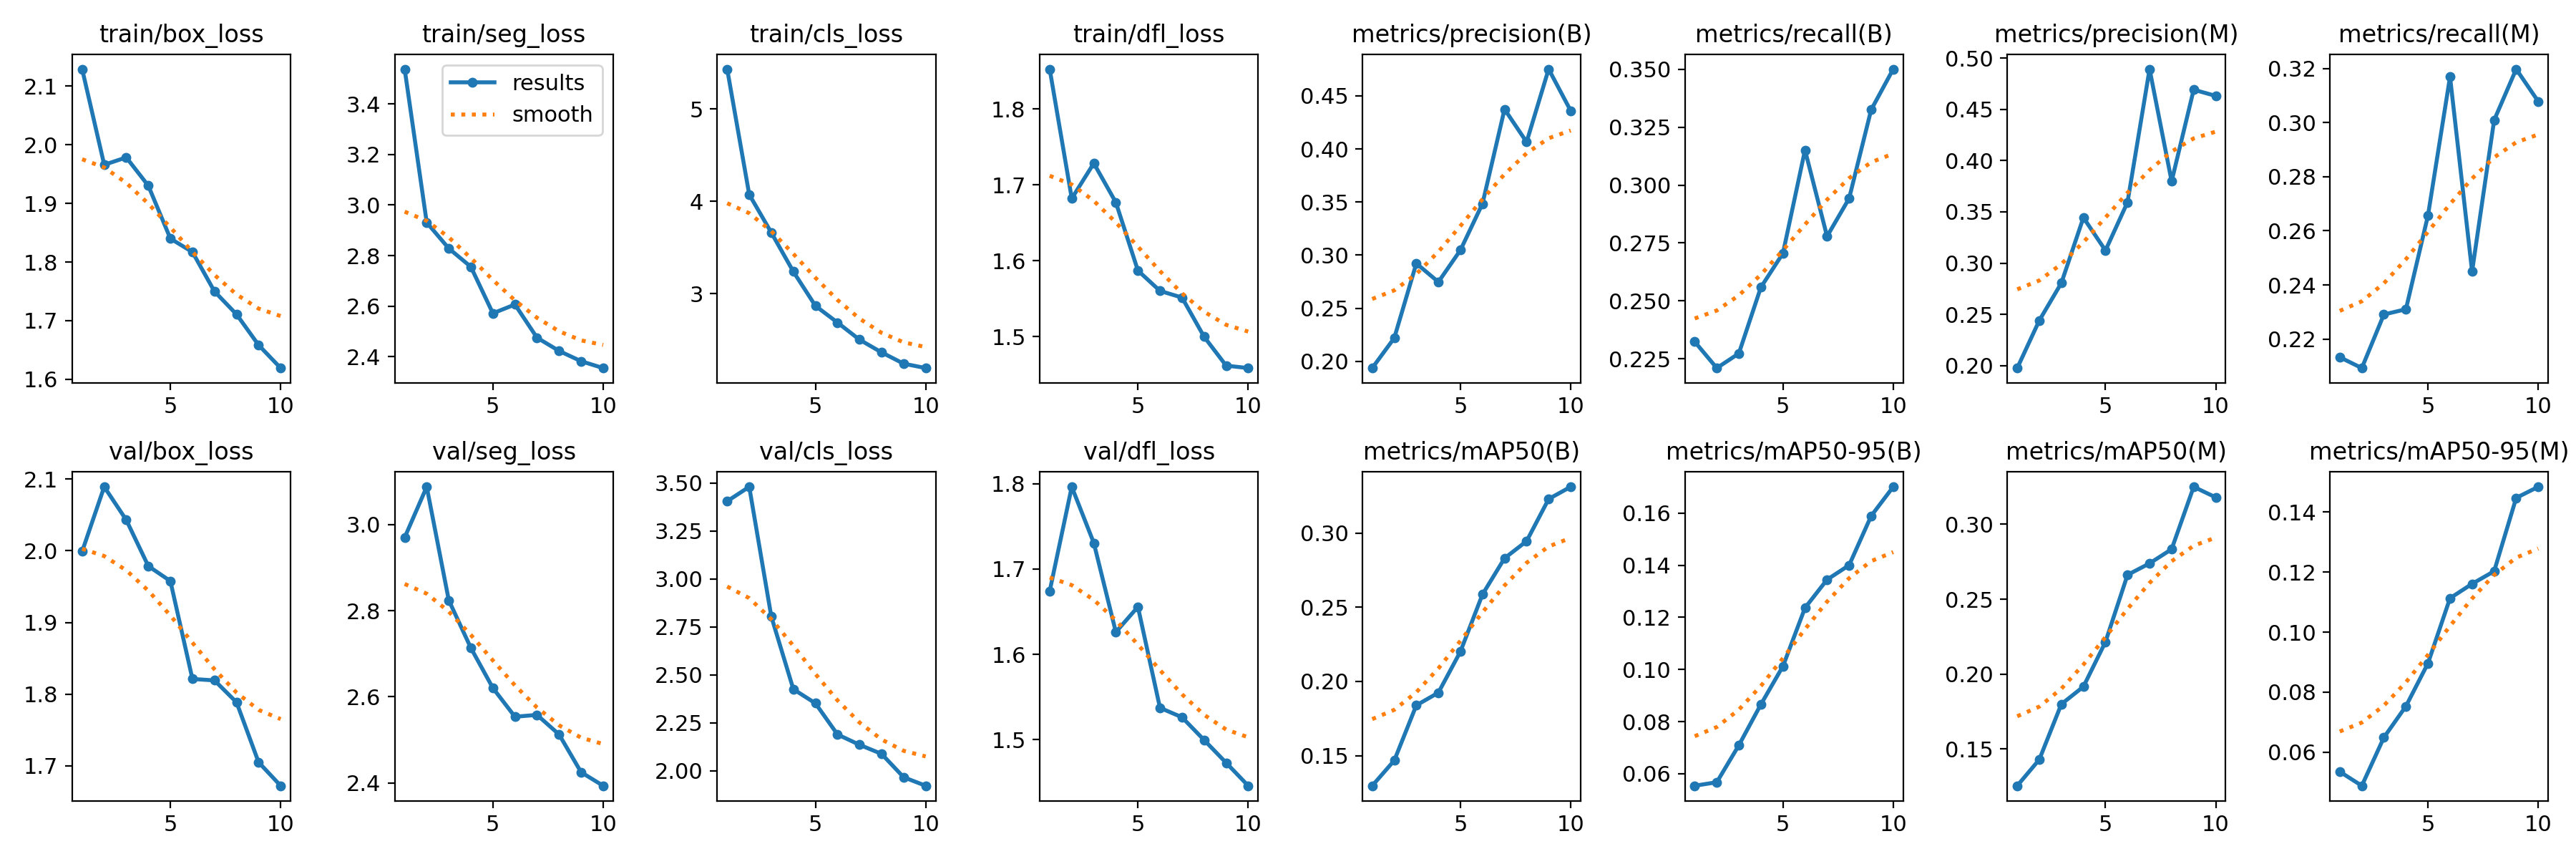

In [ ]:
Image("data/yolo/checkpoints/X_epochs-/results.png")

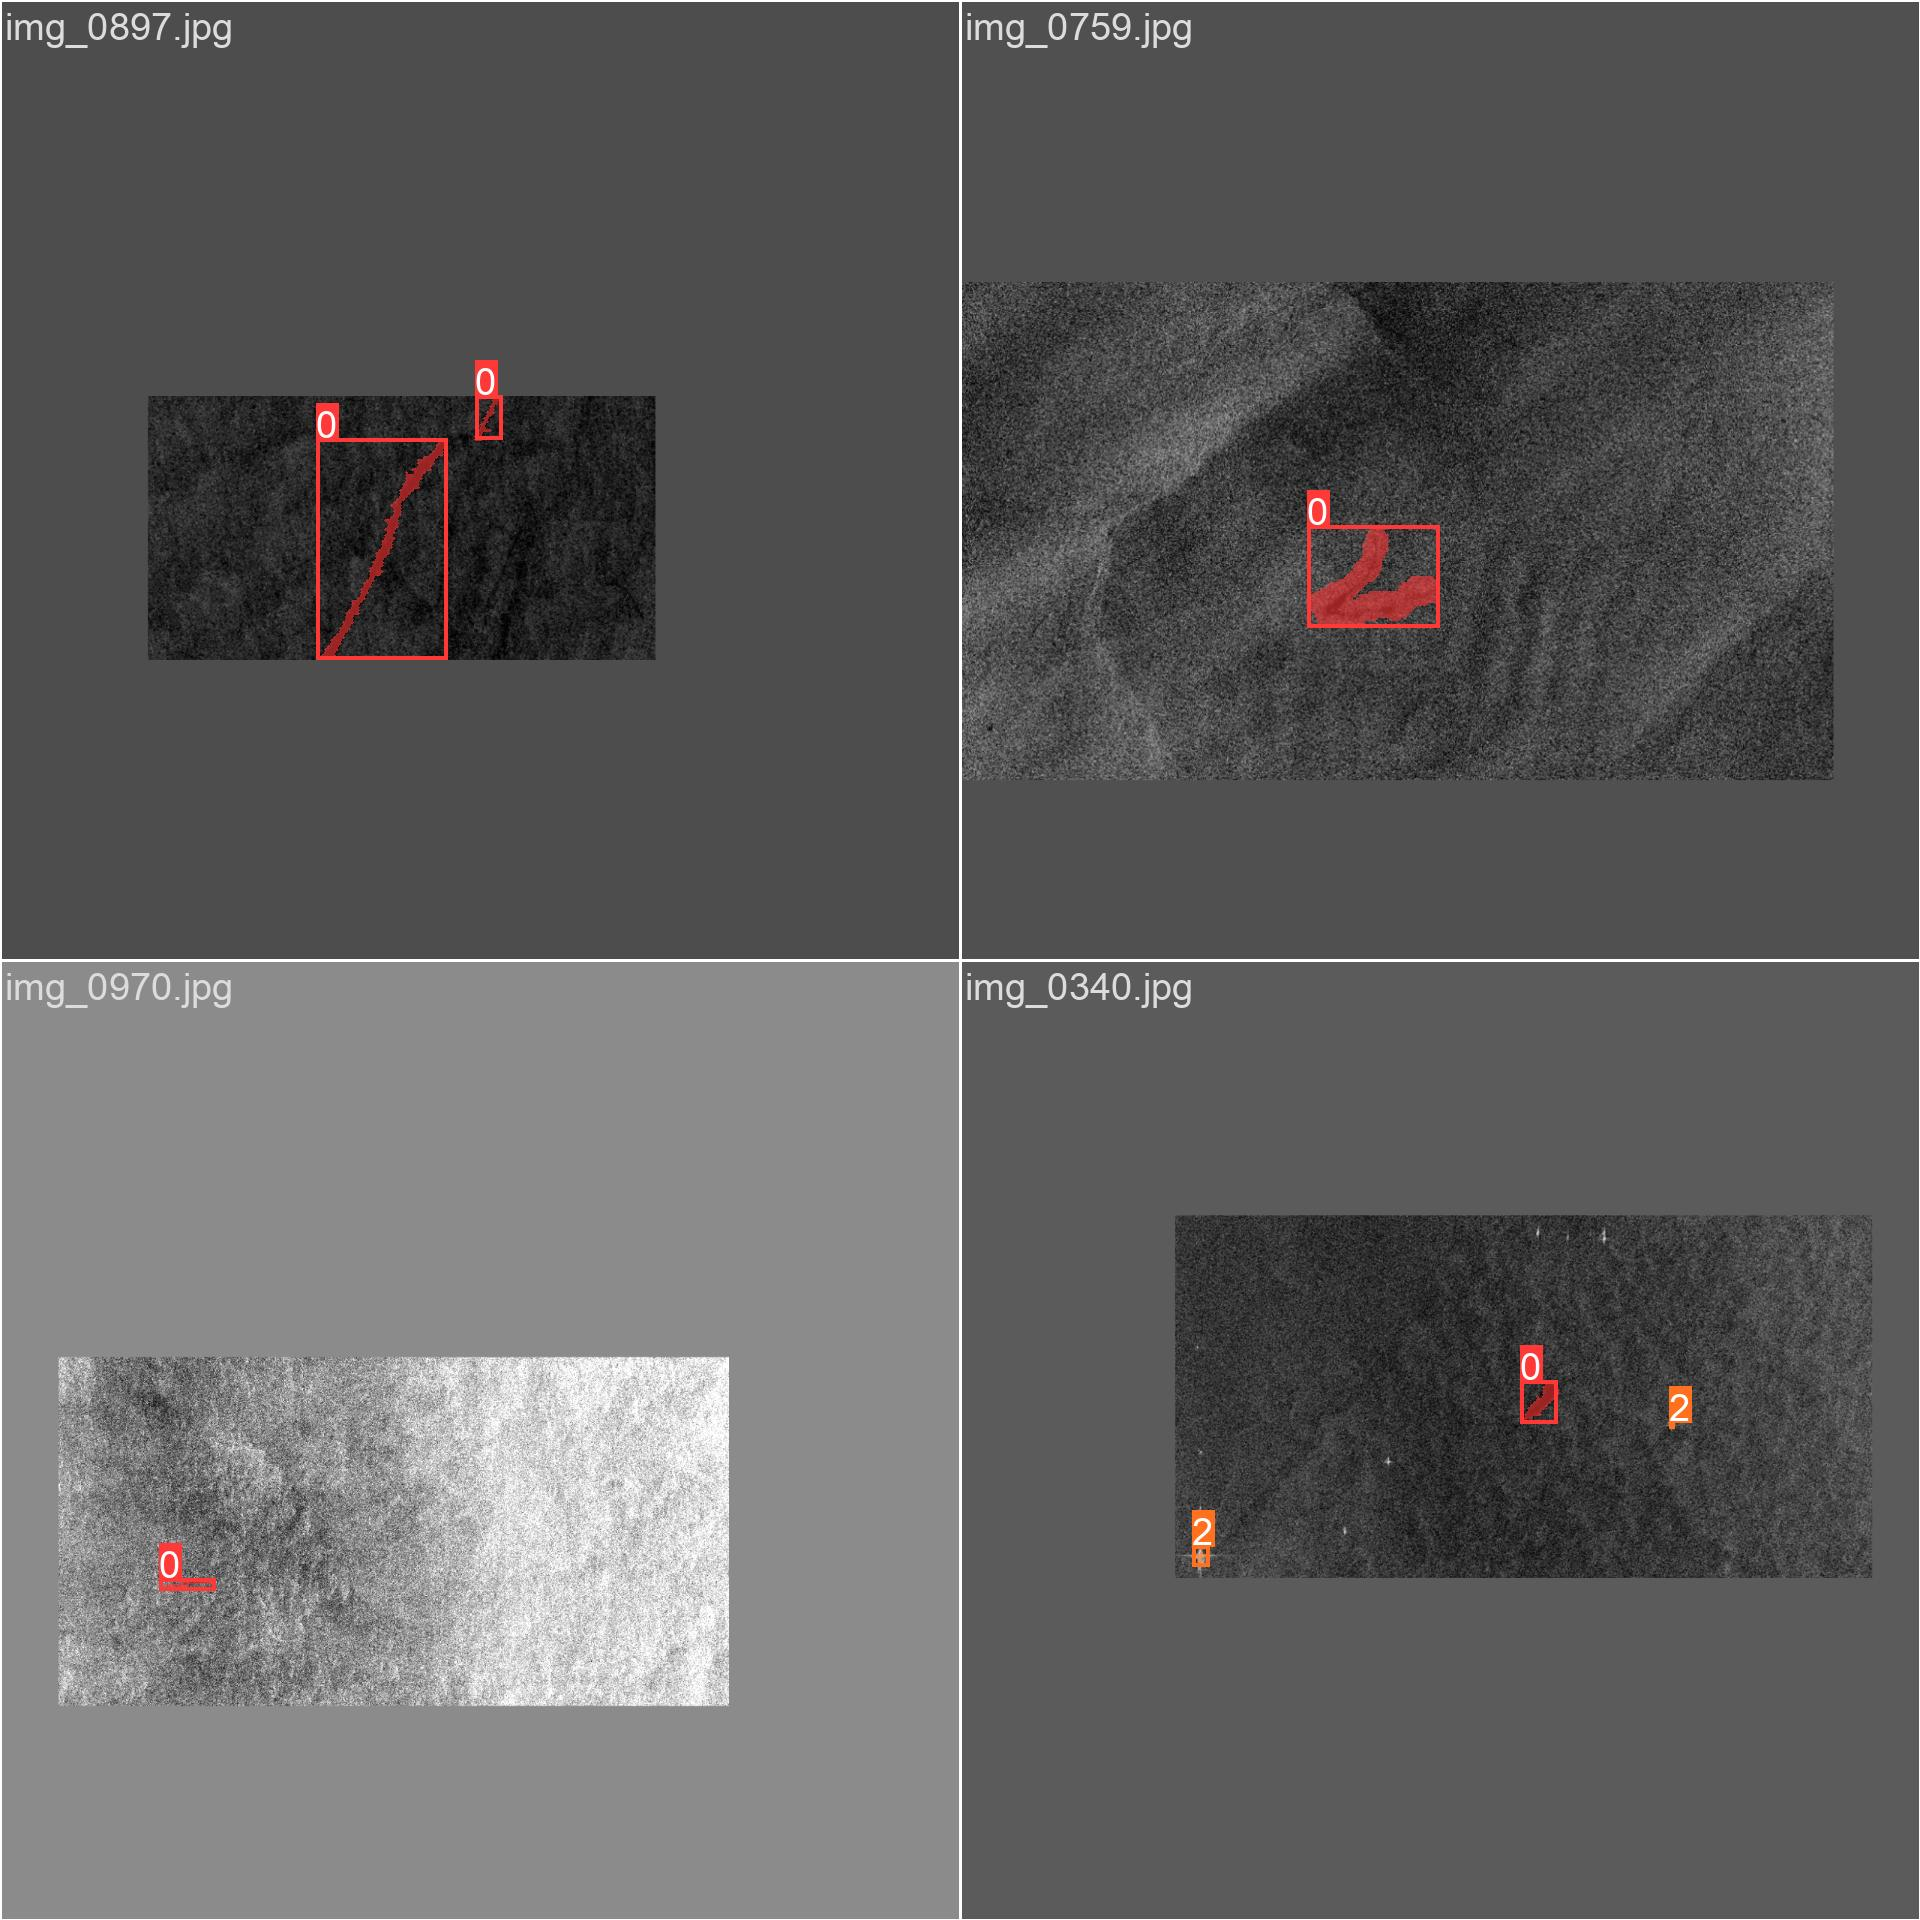

In [ ]:
Image(filename='data/yolo/checkpoints/X_epochs-/train_batch1.jpg', width=900) # dont forget to change X to the number of epochs


In [ ]:
%ls /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/checkpoints/X_epochs-/weights

best.pt  last.pt


In [ ]:
my_new_model = YOLO('data/yolo/checkpoints/X_epochs-/weights/last.pt')

In [ ]:
new_image = 'data/yolo/val/images/img_0031.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/CSCI447_ML/data/YOLOv8/valid/images/img_0031.jpg: 672x1280 5 Oil Spills, 19.9ms
Speed: 7.6ms preprocess, 19.9ms inference, 8.4ms postprocess per image at shape (1, 3, 672, 1280)


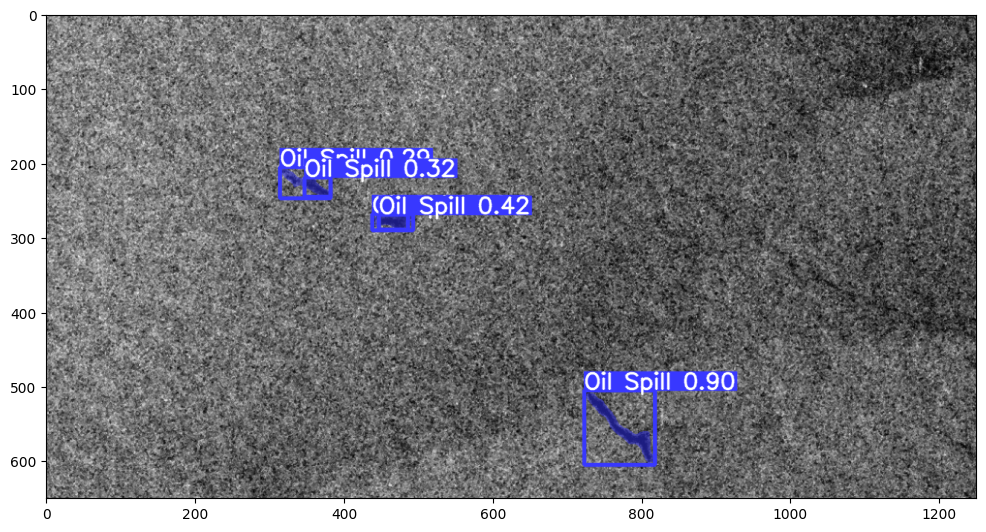

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_result = new_results[0]

In [ ]:
new_result.masks.xyn

[array([[    0.58203,     0.78245],
        [    0.58125,     0.78395],
        [    0.58125,     0.79147],
        [    0.58203,     0.79297],
        [    0.58203,     0.79447],
        [    0.58437,     0.79898],
        [    0.58437,     0.80048],
        [     0.5875,     0.80649],
        [     0.5875,     0.80799],
        [    0.58828,      0.8095],
        [    0.58906,      0.8095],
        [    0.59062,      0.8125],
        [    0.59062,       0.814],
        [    0.59375,     0.82001],
        [    0.59375,     0.82151],
        [    0.59531,     0.82452],
        [    0.59609,     0.82452],
        [    0.59766,     0.82752],
        [    0.59844,     0.82752],
        [    0.59922,     0.82903],
        [        0.6,     0.82903],
        [    0.60234,     0.83353],
        [    0.60234,     0.83504],
        [    0.60312,     0.83654],
        [    0.60312,     0.83804],
        [    0.60469,     0.84105],
        [    0.60469,     0.84255],
        [    0.60547,     0.

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([5, 672, 1280])

In [ ]:
masks_array = extracted_masks.cpu().numpy()

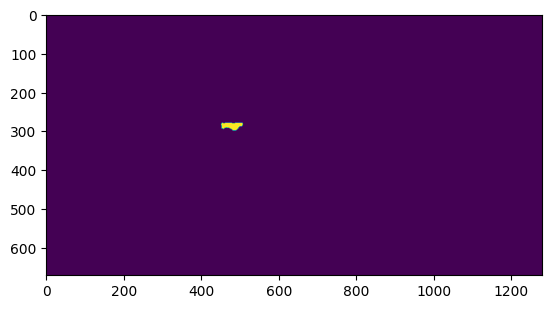

In [ ]:
plt.imshow(masks_array[4])

In [ ]:
import numpy as np
def overlap_masks(masks):
    # Initialize a blank mask
    total_mask = np.zeros_like(masks[0])

    # Iterate over each instance mask
    for mask in masks:
        # Perform a logical OR operation with the total mask
        total_mask = np.logical_or(total_mask, mask)

    return total_mask

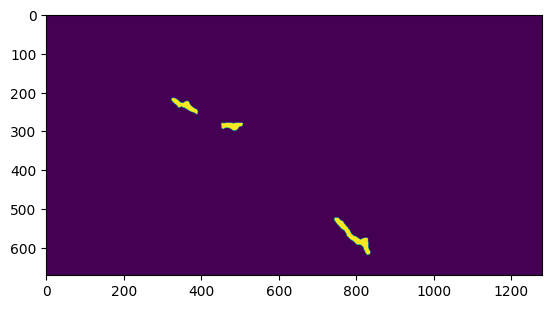

In [ ]:
mask = overlap_masks(masks_array)

plt.imshow(mask)

In [ ]:
def colorize_mask(mask, color):
    # Create a blank image with the same shape as the mask
    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

    # Set the RGB values for the mask
    colored_mask[mask] = color

    return colored_mask

In [ ]:
cyan = (0, 255, 255)
colored_mask = colorize_mask(mask, cyan)

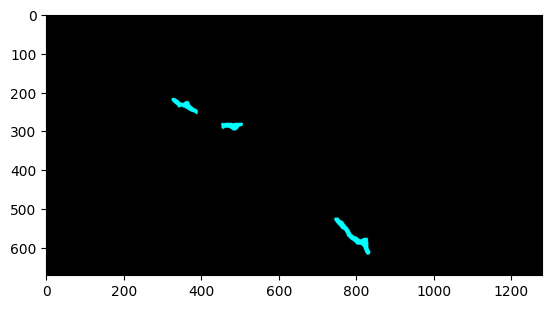

In [ ]:
plt.imshow(colored_mask)